In [1]:
import random
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
random.seed(20)

In [8]:
def gerar_variavel_exp(lamb):
    y = random.random()
    
    return -(math.log(1-y)/lamb)

amostra = [gerar_variavel_exp(1) for x in range(100000)]

exponencial_x = [i * 0.001 for i in range(16 * 1000)]
lamb = 1
exponencial_y = [lamb * math.exp(-lamb * exponencial_x[i]) for i in range(16 * 1000)]

[0, 10, 0, 1]

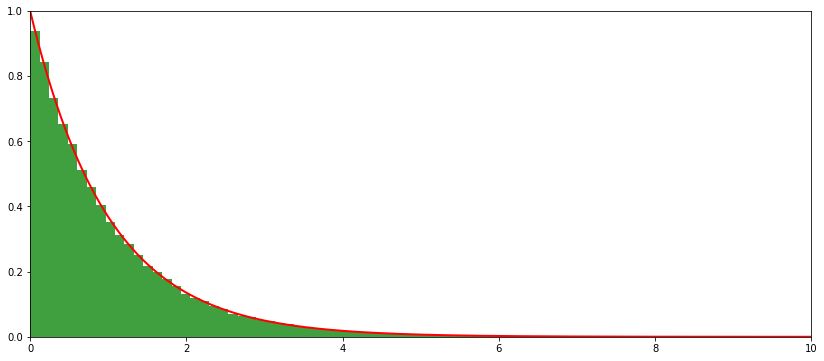

In [9]:
plt.figure( figsize=(14,6))
n, bins, patches = plt.hist(amostra, 100, density=1, facecolor='green', alpha=0.75)
plt.plot(exponencial_x, exponencial_y, 'r', lw=2)
plt.axis([0,10,0,1])


In [156]:
#constantes da fila
lamb = 2
mi = 3

#Variaveis da simulacao
N = 0 # tamanho da fila
servico_vazio = True # determina se esta tendo ou nao servico


eventos = [] #Lista de eventos
#Eventos:

pontos_x = []
pontos_y = []

# params é um array com um elemento que é o tempo de chegada da pessoa
def chegada_cliente(tempo):
    global N, servico_vazio, eventos
    global pontos_x, pontos_y
    #print("Chegada          ", tempo)
    N += 1
    pontos_x.append(tempo)
    pontos_y.append(N)
    if(servico_vazio):
        eventos.append( [tempo, comeca_fila] )
    
    
    eventos.append( [tempo + gerar_variavel_exp(lamb), chegada_cliente] )
    
def comeca_fila(tempo):
    global N, servico_vazio, eventos
    global pontos_x, pontos_y
    #print("Comeca           ", tempo)
    N -= 1
    pontos_x.append(tempo)
    pontos_y.append(N)
    servico_vazio = False
    eventos.append( [tempo + gerar_variavel_exp(mi), termina_fila] )
    
def termina_fila(tempo):
    global N, servico_vazio, eventos
    global pontos_x, pontos_y
    #print("Termina          ", tempo)
    pontos_x.append(tempo)  
    pontos_y.append(N)
    servico_vazio = True
    if(N!=0):
        eventos.append( [tempo, comeca_fila] )
        

#simulando os eventos
eventos = []

eventos.append( [gerar_variavel_exp(lamb), chegada_cliente] )

for i in range(100):
    eventos.sort()
    eventos[0][1](eventos[0][0])
    eventos.pop(0)
print("End")

End


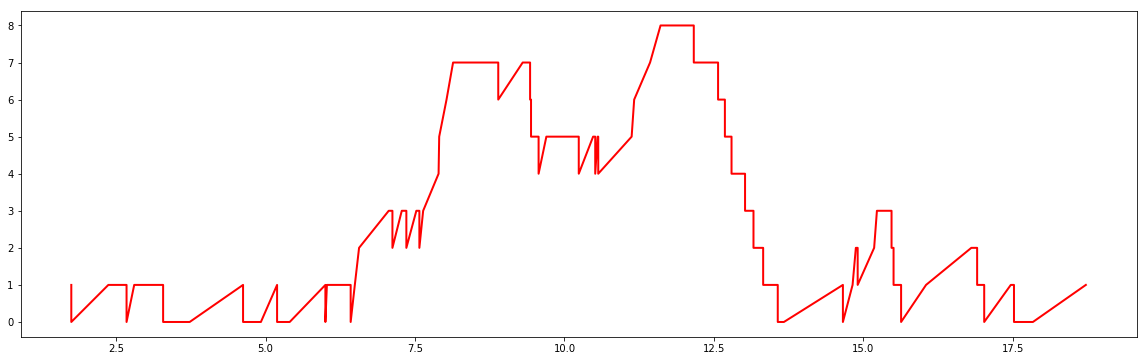

In [157]:
plt.figure( figsize=(20,6))

plt.plot(pontos_x, pontos_y, '-r', lw=2)
